In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
d=pd.read_csv('CO2 Emissions_Canada.csv')
print(d.head())


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
print(d.info())
print(d.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
print(d.duplicated().sum())

1103


In [ ]:
d['Fuel Consumption City (L/100 km)'].unique()
d['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

In [ ]:
print(d.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [ ]:
print(d.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
print(d.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


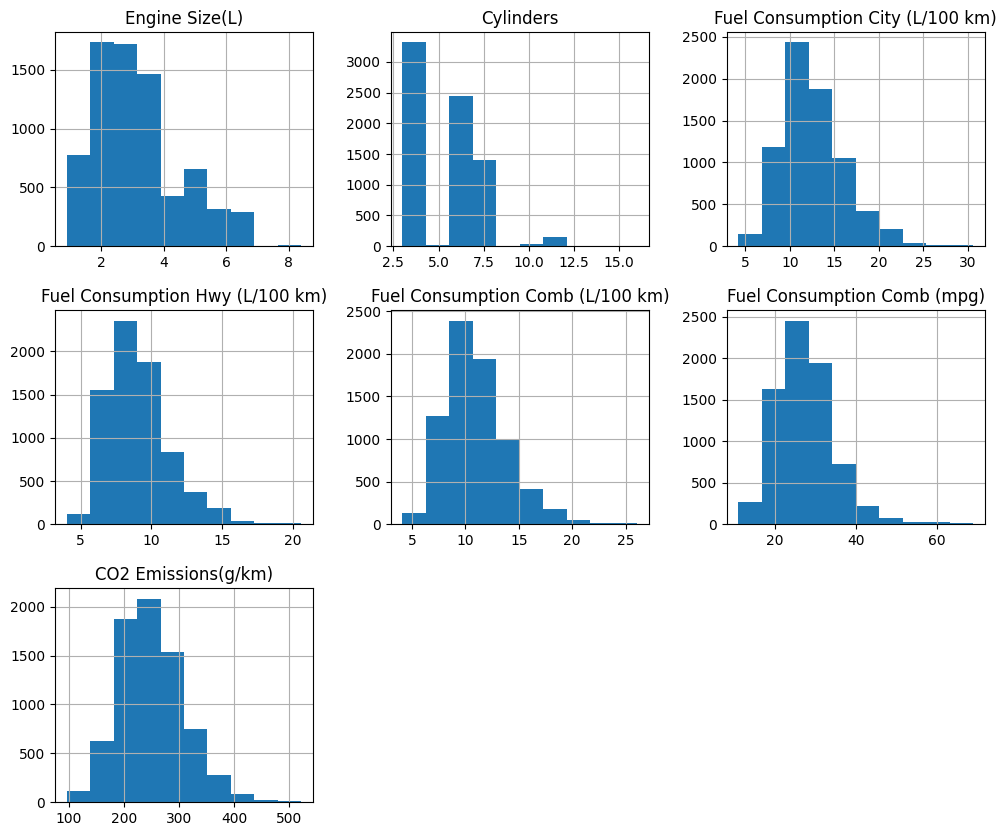

In [ ]:
d.hist(figsize=(12,10))
plt.show()

<Axes: >

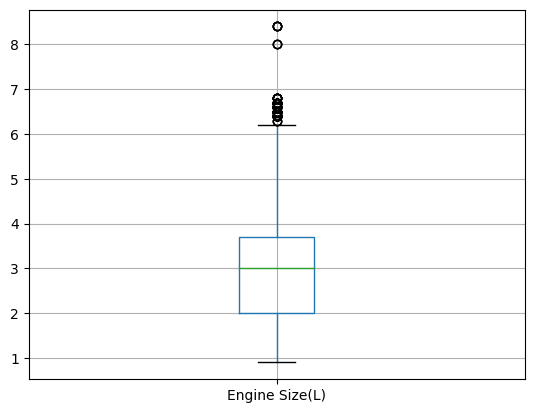

In [ ]:
#Boxplot
d['Engine Size(L)']=d['Engine Size(L)'].astype(float)
d[['Engine Size(L)']].boxplot()

<ipython-input-14-9c52a60724ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=d.corr()


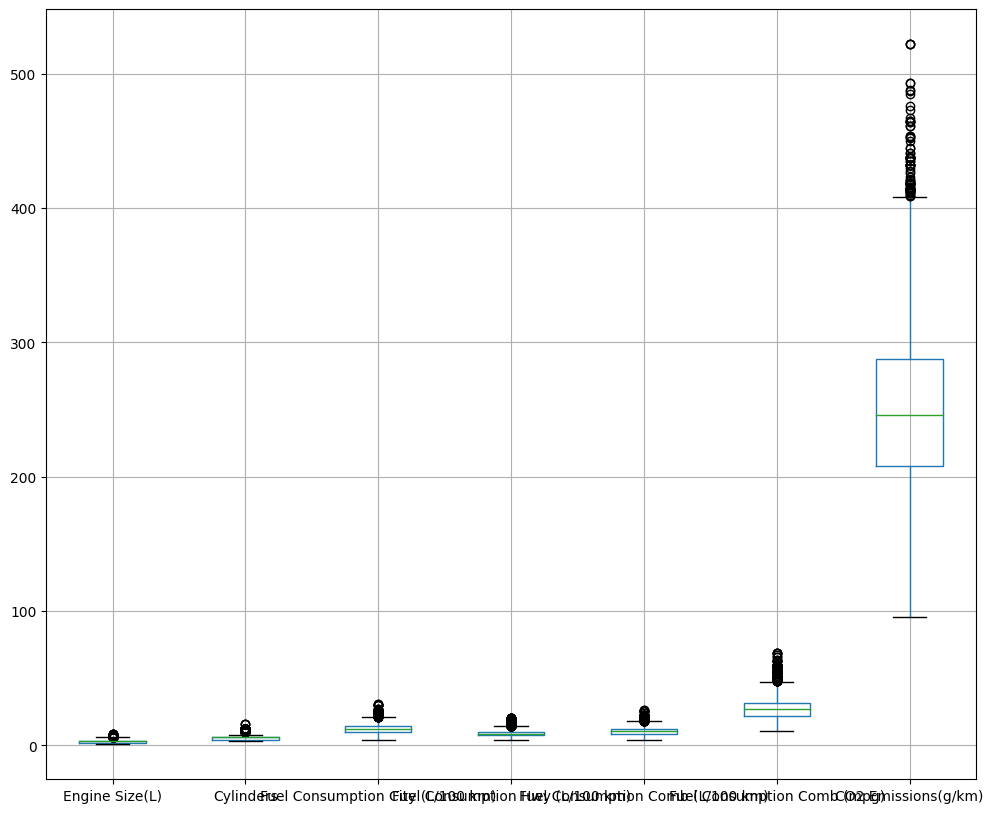

In [ ]:
corr=d.corr()
d.boxplot(figsize=(12,10))
plt.show()

In [ ]:
#1st quartile
#d.sort_values("Engine Size(L)")
q1 = np.quantile(d['Engine Size(L)'], 0.25)
# 3rd quartile
q3 = np.quantile(d['Engine Size(L)'], 0.75)
med = np.median(d['Engine Size(L)'])
# calculating  the iqr region
iqr = q3-q1
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = d['Engine Size(L)'][(d['Engine Size(L)']<= lower_bound) | (d['Engine Size(L)']>= upper_bound)]
print('The outliers in the boxplot are:{}'.format(outliers))


1.7000000000000002 6.25 -0.5500000000000003
The outliers in the boxplot are:36      6.3
75      6.8
290     6.4
300     6.4
301     6.4
       ... 
7288    6.6
7289    6.6
7290    6.7
7291    6.7
7292    6.6
Name: Engine Size(L), Length: 137, dtype: float64


In [ ]:
## Fuel Consumption City (L/100 km)
#1st quartile
q1 = np.quantile(d['Fuel Consumption City (L/100 km)'], 0.25)

#  3rd quartile
q3 = np.quantile(d['Fuel Consumption City (L/100 km)'], 0.75)
med = np.median(d['Fuel Consumption City (L/100 km)'])

# calculating the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = d['Fuel Consumption City (L/100 km)'][(d['Fuel Consumption City (L/100 km)']<= lower_bound) | (d['Fuel Consumption City (L/100 km)']>= upper_bound)]
print('The outliers in the boxplot are:{}'.format(outliers))

4.5 21.35 3.3499999999999996
The outliers in the boxplot are:75      22.3
180     23.3
182     25.7
212     23.5
214     23.7
        ... 
6879    21.8
6895    21.7
6902    22.2
7058    26.2
7059    26.6
Name: Fuel Consumption City (L/100 km), Length: 132, dtype: float64


In [ ]:
d.isna().sum()

Make                                   0
Model                                  0
Vehicle Class                          0
Engine Size(L)                      4349
Cylinders                              0
Transmission                           0
Fuel Type                              0
Fuel Consumption City (L/100 km)       0
Fuel Consumption Hwy (L/100 km)        0
Fuel Consumption Comb (L/100 km)       0
Fuel Consumption Comb (mpg)            0
CO2 Emissions(g/km)                    0
dtype: int64

In [ ]:
d['Engine Size(L)'] = d['Engine Size(L)'].fillna(d['Engine Size(L)'].mean())


In [ ]:
d.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

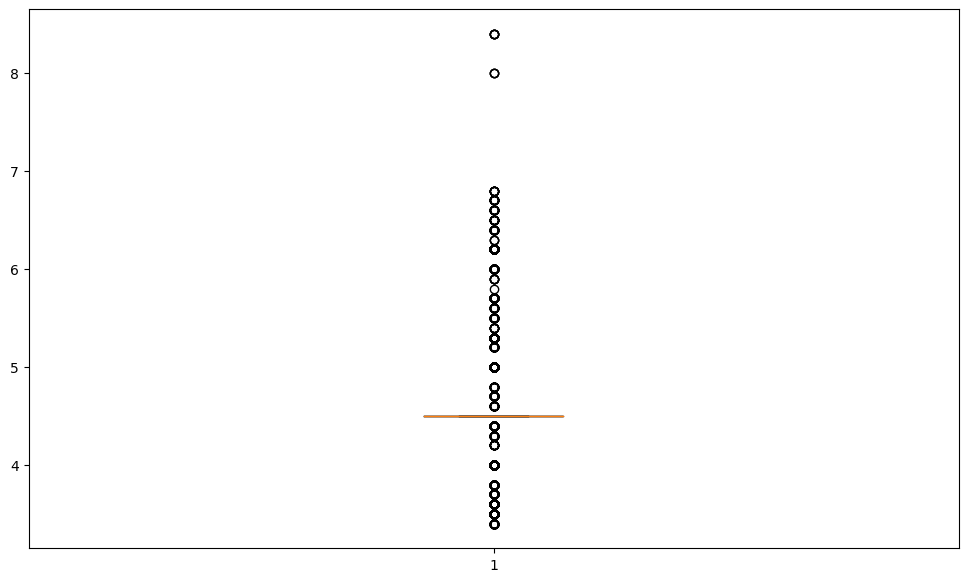

In [ ]:

d['Engine Size(L)'] = d['Engine Size(L)'][(d['Engine Size(L)'] >= lower_bound) & (d['Engine Size(L)'] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(d['Engine Size(L)'])
plt.show()

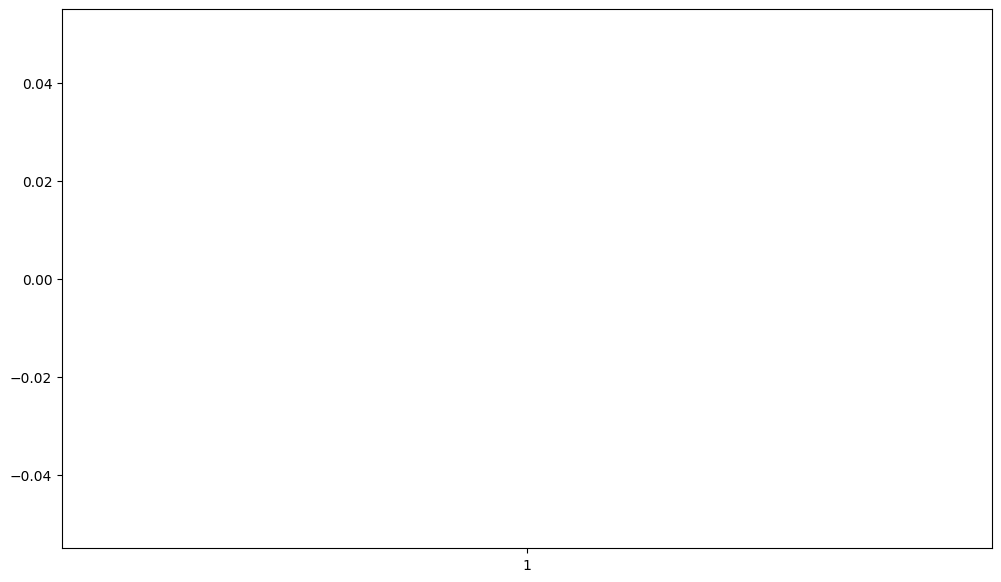

In [ ]:
d['Fuel Consumption City (L/100 km)'] = d['Fuel Consumption City (L/100 km)'][(d['Fuel Consumption City (L/100 km)'] >= lower_bound) & (d['Fuel Consumption City (L/100 km)'] <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(d['Fuel Consumption City (L/100 km)'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
d = d.select_dtypes(include=np.number)
print(d.dtypes)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(d)
X_scaled = pd.DataFrame(X_scaled, columns=d.columns)
print(X_scaled)

Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object
      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0           0.219249   0.076923                          0.333333   
1           0.219249   0.076923                          0.409357   
2           0.219249   0.076923                          0.105263   
3           0.020000   0.230769                          0.497076   
4           0.020000   0.230769                          0.461988   
...              ...        ...                               ...   
7380        0.219249   0.076923                          0.380117   
7381        0.219249   0.076923                          0.409357   
7382        0.219249   0.076923                          

<Axes: >

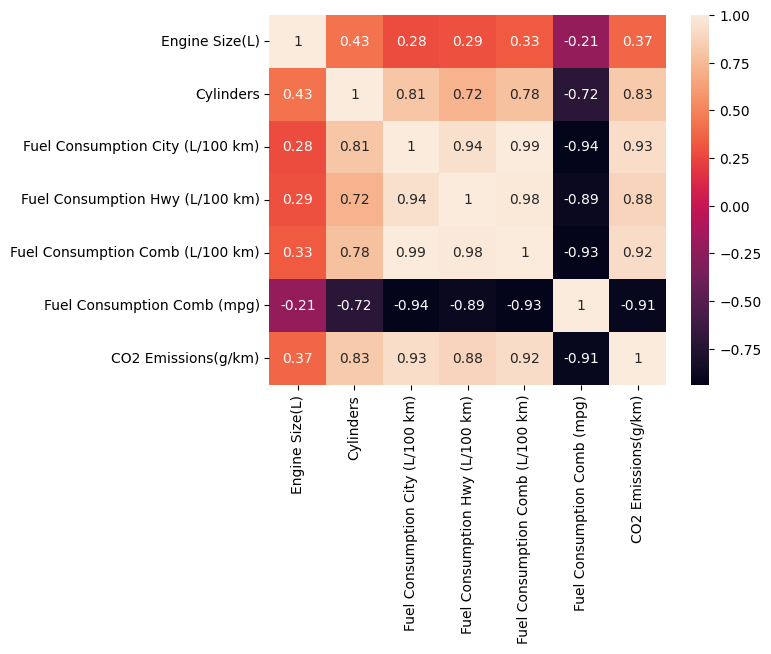

In [ ]:
sns.heatmap(d.corr(),annot=True)

In [ ]:
# Printing the dependent and independent features
X = d.drop('Fuel Consumption City (L/100 km)', axis=1) # Independent features
y = d['Fuel Consumption City (L/100 km)'] # Dependent feature
print('Independent features:', X.columns)
print('Dependent feature:', y.name)

Independent features: Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')
Dependent feature: Fuel Consumption City (L/100 km)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler
X_scaled = scaler.fit_transform(d)
X_scaled = pd.DataFrame(X_scaled, columns=d.columns)
print(X_scaled)

TypeError: ignored

In [ ]:
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel(y.name)
    plt.show()

In [ ]:
d['Fuel Consumption City (L/100 km)'] = d['Fuel Consumption City (L/100 km)'].fillna(d['Fuel Consumption City (L/100 km)'].mean())

In [ ]:
x=pd.DataFrame(d['Fuel Consumption City (L/100 km)'])
y=pd.DataFrame(d['Fuel Consumption Comb (L/100 km)'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 1)
(1477, 1)
(5908, 1)
(1477, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print("intercept:",regressor.intercept_)
print("regression coefficent:",regressor.coef_)
print(y_test)
y_pred=regressor.predict(x_test)
print(y_pred)
print("shape of x_test",x_test.shape)
print("shape of x_test",y_test.shape)

intercept: [0.8849758]
regression coefficent: [[0.81647428]]
      Fuel Consumption Comb (L/100 km)
2196                               8.8
5688                               9.1
7198                               7.5
6476                               9.4
4909                              11.2
...                                ...
6773                               8.0
2984                               8.0
4396                               7.6
5911                               4.9
3554                               8.3

[1477 rows x 1 columns]
[[8.88642379]
 [8.96807122]
 [7.66171236]
 ...
 [7.90665465]
 [4.64075751]
 [8.39653922]]
shape of x_test (1477, 1)
shape of x_test (1477, 1)


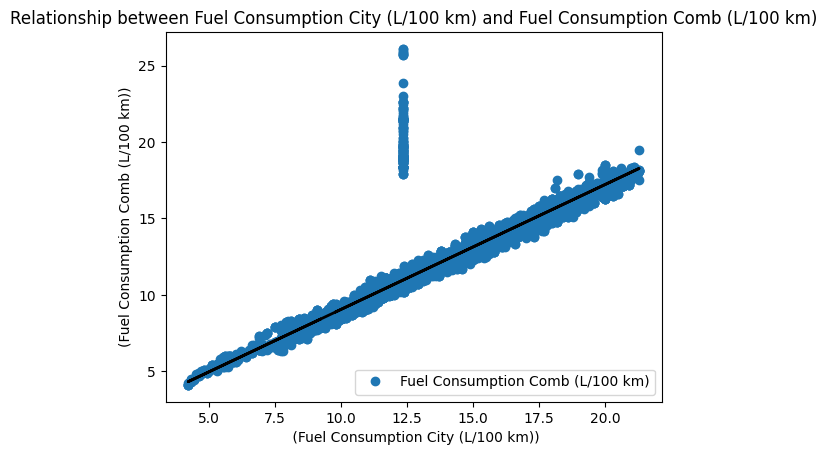

In [ ]:
d.plot(x='Fuel Consumption City (L/100 km)',y='Fuel Consumption Comb (L/100 km)',style='o')
a, b = np.polyfit(x_test["Fuel Consumption City (L/100 km)"], y_pred, 1)
plt.plot(x_test, a*x_test+b, color="black", linewidth=2)

plt.xlabel(" (Fuel Consumption City (L/100 km))")
plt.ylabel("(Fuel Consumption Comb (L/100 km))")
plt.title("Relationship between Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km)")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))
print('mean sq error:',metrics.mean_squared_error(y_test,y_pred))
print("root mean square error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R-squared score:",r2_score(y_test, y_pred))

Mean absolute error : 0.4638310008672346
mean sq error: 1.8191953730944628
root mean square error: 1.3487755087836013
R-squared score: 0.78327238776147


The model is underfitting.


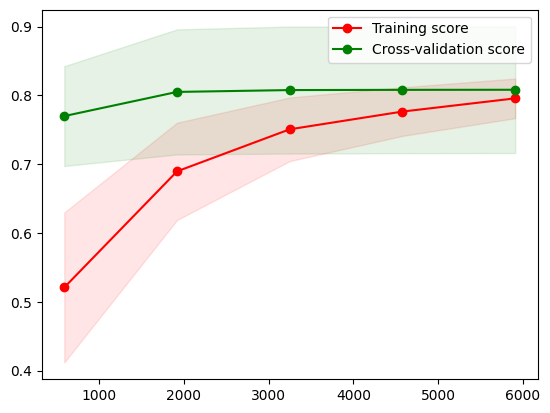

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have already defined your model and training data
# Replace 'model' with the name of your regression model
# Replace 'X' and 'y' with your training data

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(regressor, x, y)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")

# Determine if the model is underfitting, overfitting or balanced
if train_scores_mean[-1] < test_scores_mean[-1]:
    print('The model is underfitting.')
elif train_scores_mean[-1] > test_scores_mean[-1]:
    print('The model is overfitting.')
else:
    print('The model is balanced.')

plt.show()